# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
real_estate = pd.read_csv('/datasets/real_estate_data.csv')


In [2]:
real_estate.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


 У нас первая проблемма. Данные склеились разделителем, воспользуемся параметром **sep**

In [3]:
real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


У нас есть 22 признака:
+ airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
+ balcony — число балконов
+ ceiling_height — высота потолков (м)
+ cityCenters_nearest — расстояние до центра города (м)
+ days_exposition — сколько дней было размещено объявление (от публикации до снятия)
+ first_day_exposition — дата публикации
+ floors_total — всего этажей в доме
+ is_apartment — апартаменты (булев тип)
+ kitchen_area — площадь кухни в квадратных метрах (м²)
+ last_price — цена на момент снятия с публикации
+ living_area — жилая площадь в квадратных метрах(м²)
+ locality_name — название населённого пункта
+ open_plan — свободная планировка (булев тип)
+ parks_around3000 — число парков в радиусе 3 км
+ parks_nearest — расстояние до ближайшего парка (м)
+ ponds_around3000 — число водоёмов в радиусе 3 км
+ ponds_nearest — расстояние до ближайшего водоёма (м)
+ rooms — число комнат
+ studio — квартира-студия (булев тип)
+ total_area — площадь квартиры в квадратных метрах (м²)
+ total_images — число фотографий квартиры в объявлении

In [4]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Проверим  дубликаты.

In [5]:
real_estate.duplicated().sum()

0

### Проверим  пропуски.

In [6]:
real_estate.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

*Мы имеем 22 признака для определения рыночной стоимости объектов недвижимости. В столбцах balcony и floors_total нужно будет заменить тип данных на целочисленный. Дубликатов на данном этапе нет, а вот пропусков очень много.Будем разбираться!*

### Шаг 2. Предобработка данных

Мы имеем 9195 пропусков в столбце ceiling_height.Высота потолков в жилых домах устанавливается с учетом минимальных требований, установленных СНиПом и комфортного пребывания в нем. Минимальная высота должна быть 2,5 метра. Её мы и возьмём.

In [7]:
#real_estate['ceiling_height'] = real_estate['ceiling_height'].fillna(2.5)# Её мы не взяли, потому что у нас крашется диаграмма размаха.

86 пропусков в floors_total и тип данных float64(количество этажей должно быть целочисленным числом). Это ~0.36% от общего числа, что говорит нам о незначительном влиянии на общее число, допустим что это одноэтажные дома.

In [8]:
real_estate['floors_total'] = real_estate['floors_total'].fillna(1)
real_estate['floors_total'] = real_estate['floors_total'].astype('int')


1903 пропуска в столбце living_area. Жилая площадь в квадратных метрах. Не совсем правильно, но нам придётся заменить пропуски медианой, так как эти данные нам нужны.

In [9]:
real_estate['living_area'] = real_estate['living_area'].fillna(real_estate['living_area'].median())


20924 пропусков в is_apartment. ~88,3% данных этого столбца отсутствуют. Из описания мы знаем, что  апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания. Пока несовсем понятно, как этот столбец поможет нам в расчётах, и чем заменить пропуски. Вернёмся к ниму чуть позже, при необходимости.

2278 пропусков kitchen_area(площадь кухни). Как и  living_area заменим методом median().

In [10]:
real_estate['kitchen_area'].median()

9.1

In [11]:
real_estate['kitchen_area'] = real_estate['kitchen_area'].fillna(real_estate['kitchen_area'].median())


11519 пропусков balcony. Вероятнее всего эти квартиры без балконов, заменим пропуски на ноль.

In [12]:
real_estate['balcony'] = real_estate['balcony'].fillna(0)

In [13]:
real_estate['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

49 пропусков в locality_name. Этот столбец нам очень важен, так как это 1 из главных критериев ценообразования. Учитывая что пропусков ~0,2% от общего числа, попробуем их удалить методом dropna(). Так же поменяем букву 'ё' на 'е' в слове 'посёлок' для исключения возможных дубликатов.

In [14]:
real_estate['locality_name'] = real_estate.loc[:,'locality_name'].replace('ё', 'е', regex = True)
real_estate.dropna(subset = ['locality_name'],inplace = True)

In [15]:
real_estate['locality_name'].sort_values().unique()


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

In [16]:
real_estate['locality_name'].value_counts()

Санкт-Петербург             15721
поселок Мурино                556
поселок Шушары                440
Всеволожск                    398
Пушкин                        369
                            ...  
поселок Дзержинского            1
поселок Мыза-Ивановка           1
деревня Старое Хинколово        1
деревня Тойворово               1
село Шум                        1
Name: locality_name, Length: 330, dtype: int64

In [17]:
#Для 'airports_nearest' и 'cityCenters_nearest' найдём медиану по названию населённого пункта.
median_nearest = real_estate.pivot_table(
    index='locality_name',
    values=['airports_nearest', 'cityCenters_nearest'],
    aggfunc='median'
)
median_nearest

,airports_nearest,cityCenters_nearest
locality_name,,
Зеленогорск,72282.0,53381.0
Колпино,26232.0,32018.0
Красное Село,25715.5,29140.5
Кронштадт,67850.0,49575.0
Ломоносов,48415.5,51677.0
Павловск,20529.5,32683.0
Петергоф,39231.0,33771.0
Пушкин,15766.0,27930.5
Санкт-Петербург,26757.5,12244.5


In [18]:
median_nearest_localities = list(median_nearest.index)

In [19]:
def fill_missing_nearest(row, col):
    locality = row['locality_name']
    
    if locality in median_nearest_localities:
        return median_nearest.loc[locality][col]
    
    return row[col]

In [20]:
columns = ['airports_nearest', 'cityCenters_nearest']

for column in columns:
    real_estate.loc[real_estate[column].isnull(), column] = real_estate.apply(fill_missing_nearest, axis=1, args=(column,))

In [21]:
len(real_estate[real_estate['cityCenters_nearest'].isnull()]['locality_name'].unique())

303

In [22]:
real_estate.duplicated().sum()#проверим теперь дубликаты.

0

Посмотрим как изменилась ситуация с пропусками.

In [23]:
real_estate.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total                0
living_area                 0
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4864
cityCenters_nearest      4864
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Уже лучше! Из очевидно days_exposition(3180) заменим медианой. Также бросается в глаза несоответсвие, почти в 3 раза, предоставленных разными источниками, данных по паркам и водоёмам. К ним мы будем обращаться при необходимости, а пока оставим как есть. 

In [24]:
real_estate['days_exposition'] = real_estate['days_exposition'].fillna(real_estate['days_exposition'].median())

In [25]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18786 non-null float64
cityCenters_nearest     18786 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000 

Помимо количества этажей floors_total,который мы уже привели к типу int, также приведём к целочисленному типу balcony и days_exposition. Все эти значения не могут быть дробными.

In [26]:
real_estate['balcony'] = real_estate['balcony'].astype('int')
real_estate['days_exposition'] = real_estate['days_exposition'].astype('int')


### Шаг 3. Посчитаем и добавим в таблицу

###  Цена квадратного метра.###

In [27]:
#Найдём цену 1 м² с помощью оператора /,общей цены и общей площади.
real_estate['price_square_meter'] = real_estate['last_price'] / real_estate['total_area']

###  День недели, месяц и год публикации объявления.###

In [28]:
#Изменим формат времени, приведя его к виду Год/месяц/день
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y.%m.%d')

In [29]:
#Разделим дату на Год,месяц и день недели
real_estate['day_exposition'] = real_estate['first_day_exposition'].dt.weekday
real_estate['month_exposition'] = real_estate['first_day_exposition'].dt.month
real_estate['year_exposition'] = real_estate['first_day_exposition'].dt.year

### Этажи квартиры.

In [30]:
#Для определения первого и последнего этажа создадим функцию,затем применим её к столбцу 'floor'
def categorize_floor(row):

    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
    
real_estate.loc[:, 'floor'] = real_estate.apply(categorize_floor, axis=1)

In [31]:
real_estate['floor'].value_counts()

другой       17408
последний     3330
первый        2912
Name: floor, dtype: int64

### Cоотношение жилой и общей площади.

In [32]:
#Найдём cоотношение жилой и общей площади c помощью оператора /
real_estate['la_on_ta'] = real_estate['living_area'] / real_estate['total_area']

### Отношение площади кухни к общей.

In [33]:
#Найдём cоотношение кухни и общей площади c помощью оператора /
real_estate['ka_on_ta'] = real_estate['kitchen_area'] / real_estate['total_area']

In [34]:
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_exposition,month_exposition,year_exposition,la_on_ta,ka_on_ta
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,другой,NaN,...,482.0,2.0,755.0,95,120370.370370,3,3,2019,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,первый,NaN,...,NaN,0.0,NaN,81,82920.792079,1,12,2018,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,другой,NaN,...,90.0,2.0,574.0,558,92785.714286,3,8,2015,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,30.0,другой,NaN,...,84.0,3.0,234.0,424,408176.100629,4,7,2015,0.188679,0.057233
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,другой,NaN,...,112.0,1.0,48.0,121,100000.000000,1,6,2018,0.320000,0.410000


Произвели необходимые расчёты и добавили их в таблицу.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Исследовательский анализ площади

In [35]:
real_estate['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

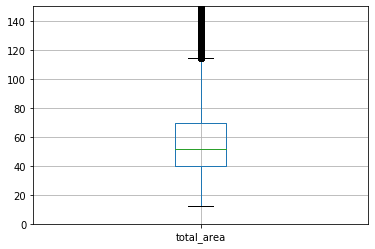

In [36]:
plt.ylim(0, 150)
real_estate.boxplot('total_area')
plt.show()

Основная масса квартир лежит в ящике от 40 до 70 м². Нижний ус упирается в 12 м², верхний примерно в 115 м². Все остальные значения будем считать выбросами.

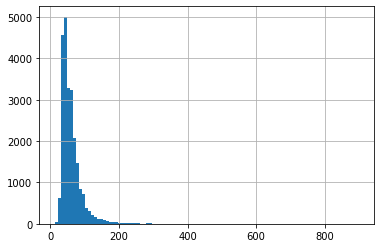

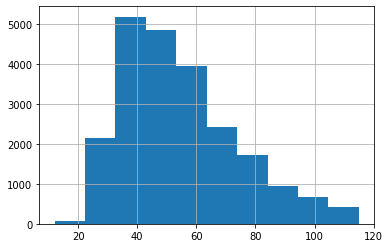

In [37]:
real_estate['total_area'].hist(bins=100)#исходные данные
plt.show()
real_estate.query('total_area >= 12 and total_area <= 115')['total_area'].hist()#данные без выбросов
plt.show()

### Исследовательский анализ цены

In [38]:
real_estate['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

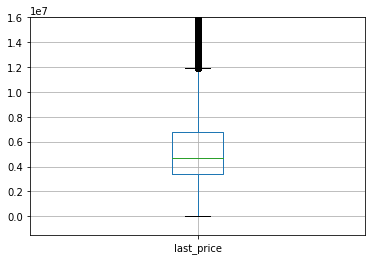

In [39]:
plt.ylim(-1.5e+06,1.6e+07)
real_estate.boxplot('last_price')
plt.show()

Основная масса цен лежит в ящике от 3.4 до 6.8 млн. Выглядит правдоподобно, а вот нижний ус упирается в 0, где-то ошибка в данных. Верхний ус упирается в 12 млн. Всё остальное выбросы.

In [40]:
min_real_estate = real_estate.query('last_price < 5e+05')#Возьмём срез цен ниже 500 тысяч.
min_real_estate.sort_values(by = 'last_price').head()[['locality_name', 'last_price', 'total_area']]

,locality_name,last_price,total_area
8793,Санкт-Петербург,12190.0,109.0
14911,поселок станции Свирь,430000.0,54.0
17456,Сланцы,430000.0,30.4
16274,деревня Старополье,440000.0,40.0
5698,городской поселок Будогощь,450000.0,42.0


Квартира в Санкт-Петербурге 109м² за 12190. Уберём эту ошибку и отметим нижнюю границу в 430000.

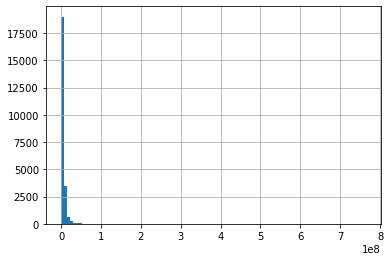

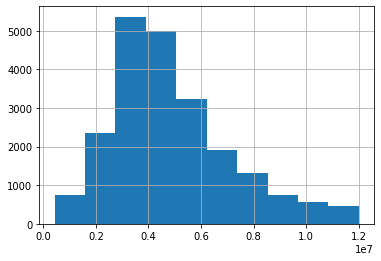

In [41]:
real_estate['last_price'].hist(bins=100)#Исходные данные
plt.show()
real_estate.query('last_price >= 4.3e+05 and last_price <= 1.2e+07')['last_price'].hist()#данные без выбросов
plt.show()

### Исследовательский анализ числа комнат

In [42]:
real_estate['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

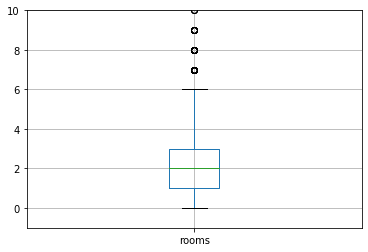

In [43]:
plt.ylim(-1, 10)
real_estate.boxplot('rooms')
plt.show()

Основная масса цен лежит в ящике от 1 до 3 комнат. Нижний ус упирается в 0, видимо опять ошибка в данных. Верхний ус в 6 комнат, всё остальное выбросы.

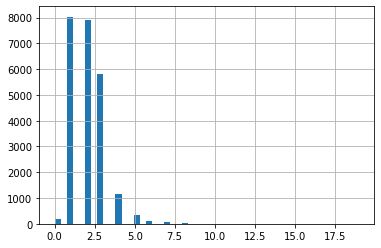

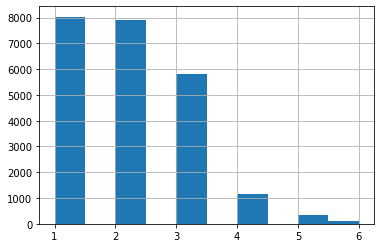

In [44]:
real_estate['rooms'].hist(bins=50)#исходные данные
plt.show()
real_estate.query('rooms >= 1 and rooms <= 6')['rooms'].hist()#данные без выбросов
plt.show()

### Исследовательский анализ высоты потолков

In [45]:
real_estate['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

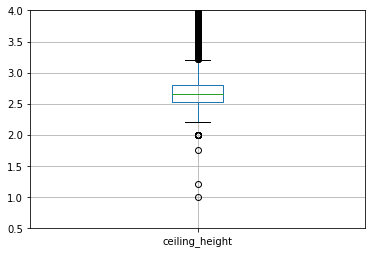

In [46]:
plt.ylim(0.5,4)
real_estate.boxplot('ceiling_height')
plt.show()

Основная масса цен лежит в ящике от 2.52 до 2.8м. Верхний ус упирается в 3.2м.Нижний упирается в 2.2м.Всё остальное выброс, но зная из предобработки, мы уже изучили этот вопрос, по нормам комфортного пребывания, высота должна быть не менее 2.5м.

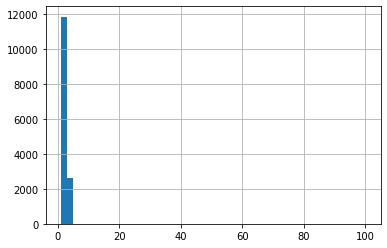

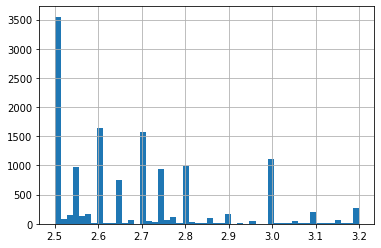

In [47]:
real_estate['ceiling_height'].hist(bins=50)#исходные данные
plt.show()
real_estate.query('ceiling_height >= 2.5 and ceiling_height <= 3.2')['ceiling_height'].hist(bins=50)#данные без выбросов
plt.show()

### Исследовательский анализ время продажи

In [48]:
real_estate['days_exposition'].describe()

count    23650.000000
mean       169.222748
std        206.550577
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

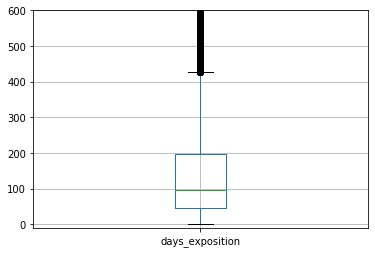

In [49]:
plt.ylim(-10,600)
real_estate.boxplot('days_exposition')
plt.show()

Основная масса дней продаж в ящике от 45 до 200 дней.Верхний ус упирается в 430 дней, а нижний в 1. Медиана продаж 95 дней.Продажи в течении 45 дней будем считать необычно быстрыми, дольше 200 необычно долгими.

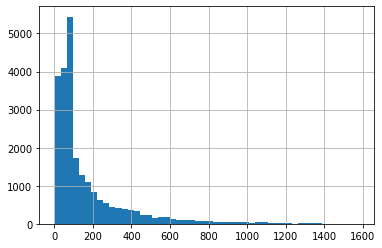

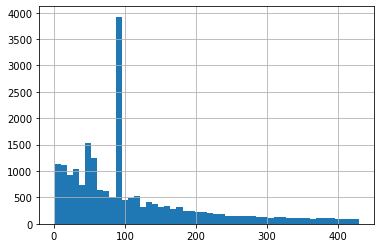

In [50]:
real_estate['days_exposition'].hist(bins=50)#исходные данные
plt.show()
real_estate.query('days_exposition >= 1 and days_exposition <= 430')['days_exposition'].hist(bins=50)#данные без выбросов
plt.show()

## Изучим факторы стоимости квартиры

Факторами возьмём наши срезы бкз выбросов.

In [51]:
good_total_area = 'total_area >= 12 and total_area <= 115'
good_last_price = 'last_price >= 4.3e+05 and last_price <= 1.2e+07'
good_rooms = 'rooms >= 1 and rooms <= 6'
good_ceiling_height = 'ceiling_height >= 2.5 and ceiling_height <= 3.2'
good_days_exposition = 'days_exposition >= 1 and days_exposition <= 430'

### Зависимость цены от м²

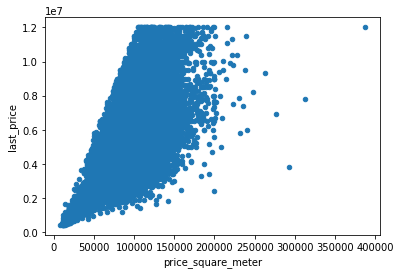

In [52]:
good_data_query = f'{good_total_area} and {good_last_price}'
good_data = real_estate.query(good_data_query)
good_data.plot(x='price_square_meter', y='last_price', kind='scatter')
plt.show()

In [53]:
good_data['last_price'].corr(good_data['price_square_meter'])

0.6316217101229414

По диаграмме и коэффициенту корреляции Пирсона видим, что общая цена зависит от стоимости квадратного метра. 

### Зависимость цены от числа комнат

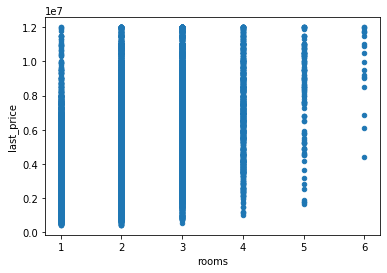

In [54]:
good_data_query = f'{good_last_price} and {good_rooms}'
good_data = real_estate.query(good_data_query)
good_data.plot(x='rooms', y='last_price', kind='scatter')
plt.show()

In [55]:
good_data['last_price'].corr(good_data['rooms'])

0.45172158274311164

По диаграмме и коэффициенту корреляции Пирсона видим, что между ценой и количеством комнат зависимость не такая сильная, как цены с м².

### Зависимость цены от удалённости от центра

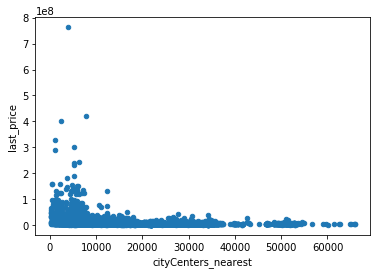

In [56]:
good_data = real_estate.query(good_last_price)
real_estate.plot(x='cityCenters_nearest', y='last_price', kind='scatter')
plt.show()

In [57]:
good_data['last_price'].corr(good_data['cityCenters_nearest'])

-0.36373401982710585

По диаграмме и коэффициенту корреляции Пирсона видим, что к центру квартиры дороже, но зависимость слабая.

### Зависимость цены от этажа

In [58]:
real_estate[['floor', 'last_price']].query(good_last_price).pivot_table(index='floor', values='last_price')

,last_price
floor,
другой,5.070738e+06
первый,4.160734e+06
последний,4.532461e+06


Первый и последний дешевле тех, что между ними.

### Зависимость цены от даты размещения объявления

In [59]:
good_data = real_estate.query(f'{good_days_exposition} and {good_last_price}')

In [60]:
good_data[['day_exposition', 'month_exposition', 'year_exposition', 'last_price']].corr()

,day_exposition,month_exposition,year_exposition,last_price
day_exposition,1.000000,0.012333,-0.012724,-0.013304
month_exposition,0.012333,1.000000,-0.308828,0.002434
year_exposition,-0.012724,-0.308828,1.000000,0.029711
last_price,-0.013304,0.002434,0.029711,1.000000


Зависимости между ценой и датой размещения нет.

### 10 населённых пунктов с наибольшим числом объявлений

In [61]:
top_locality_name = real_estate['locality_name'].value_counts().head(10)
top_locality_name

Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [62]:
top_local_names = list(top_locality_name.index)


In [63]:
(
    real_estate.query(f'locality_name in @top_local_names and {good_last_price}')
    .pivot_table(index='locality_name', values='price_square_meter')
    .sort_values(by='price_square_meter', ascending=False)
)

,price_square_meter
locality_name,
Санкт-Петербург,105628.948318
Пушкин,100322.823868
деревня Кудрово,92409.726322
поселок Парголово,90175.913458
поселок Мурино,85681.762601
поселок Шушары,78677.364217
Колпино,75185.478229
Гатчина,68421.902770
Всеволожск,67214.252635


В Санкт-Петербург самый дорогой м², в Выборге самый дешёвый.

### Изучим предложения квартир в Санкт-Петербурге и выясним, какая область входит в центр.

In [64]:
#выберем всю недвижимость Cанкт-Петербурга
saint_petersburg = pd.DataFrame(real_estate.loc[real_estate['locality_name'] == "Санкт-Петербург"])
saint_petersburg.reset_index()
len(saint_petersburg)

15721

In [65]:
# Создадим столбец с расстоянием до центра в километрах округляя до целых значений
km = 1_000
saint_petersburg['cityCenters_nearest_km'] = (saint_petersburg['cityCenters_nearest'] / km).astype('int')

In [66]:
spb_prices = saint_petersburg.query(good_last_price)
spb_prices.pivot_table(index='cityCenters_nearest_km', values='last_price')

,last_price
cityCenters_nearest_km,
0,8.429409e+06
1,8.396685e+06
2,7.721342e+06
3,7.598287e+06
4,7.856875e+06
5,7.446107e+06
6,6.887989e+06
7,6.765614e+06
8,6.353700e+06


Посмотрим график зависимости цены от удаления от центра.

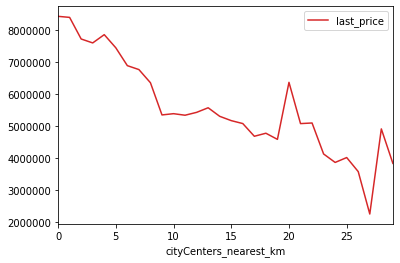

In [67]:
(
    pd.DataFrame(spb_prices.pivot_table(index='cityCenters_nearest_km', values='last_price').to_records())
    .plot(x='cityCenters_nearest_km', y='last_price',color='tab:red')
)
plt.show()

### На графике цена сильно меняется на расстояние в 3км — это и будет центральная зона.

### Выделим сегмент квартир в центре

In [68]:
apartments_in_center = pd.DataFrame(spb_prices.query('cityCenters_nearest_km <= 3'))
len(apartments_in_center)

768

#### Проанализируем площадь этой территории

In [69]:
apartments_in_center.query(good_total_area)['total_area'].describe()

count    714.000000
mean      69.209356
std       21.624689
min       12.000000
25%       52.775000
50%       68.950000
75%       85.000000
max      115.000000
Name: total_area, dtype: float64

Средняя площадь ~69м²

#### Проанализируем цену квартир на этой территории

In [70]:
apartments_in_center['last_price'].describe()

count    7.680000e+02
mean     7.828927e+06
std      2.241980e+06
min      2.100000e+06
25%      6.200000e+06
50%      7.789500e+06
75%      9.500000e+06
max      1.200000e+07
Name: last_price, dtype: float64

Средняя цена ~7.8 млн

#### Проанализируем число комнат квартир на этой территории

In [71]:
apartments_in_center['rooms'].describe()

count    768.00000
mean       2.61849
std        1.08877
min        0.00000
25%        2.00000
50%        3.00000
75%        3.00000
max        6.00000
Name: rooms, dtype: float64

Объявлений по трёшкам в центре больше.

#### Проанализируем высоту потолков квартир на этой территории

In [72]:
apartments_in_center.query(good_ceiling_height)['ceiling_height'].describe()

count    342.000000
mean       2.948041
std        0.187674
min        2.500000
25%        2.800000
50%        3.000000
75%        3.100000
max        3.200000
Name: ceiling_height, dtype: float64

Средняя высота потолков в центре ~3м

### Выделим факторы, влияющие на стоимость квартиры

In [73]:
good_real_estate =f'{good_total_area} and {good_last_price} and {good_rooms} and {good_ceiling_height} and {good_days_exposition}'
good_real = apartments_in_center.query(good_real_estate)

In [74]:
factors = ['last_price','cityCenters_nearest_km','total_area','rooms','ceiling_height','day_exposition','month_exposition','year_exposition']

In [75]:
good_real[factors].corr().sort_values('last_price',ascending = False)

,last_price,cityCenters_nearest_km,total_area,rooms,ceiling_height,day_exposition,month_exposition,year_exposition
last_price,1.000000,-0.029567,0.688460,0.455970,0.042497,-0.085770,-0.092377,0.092213
total_area,0.688460,0.040646,1.000000,0.755101,0.106289,-0.069603,-0.073628,-0.032081
rooms,0.455970,-0.015698,0.755101,1.000000,0.063533,-0.052139,-0.036533,0.021213
year_exposition,0.092213,0.026565,-0.032081,0.021213,0.083170,-0.020334,-0.360833,1.000000
ceiling_height,0.042497,0.106200,0.106289,0.063533,1.000000,-0.017920,0.016601,0.083170
cityCenters_nearest_km,-0.029567,1.000000,0.040646,-0.015698,0.106200,-0.090329,-0.017677,0.026565
day_exposition,-0.085770,-0.090329,-0.069603,-0.052139,-0.017920,1.000000,0.113682,-0.020334
month_exposition,-0.092377,-0.017677,-0.073628,-0.036533,0.016601,0.113682,1.000000,-0.360833


In [76]:
# этаж
good_real.pivot_table(index='floor', values='last_price').sort_values(by='last_price')

,last_price
floor,
первый,6.918625e+06
последний,7.872506e+06
другой,7.916099e+06


### Шаг 5. Общий вывод

*Как и предполагалось, недвижимость в центре Санкт-Петербурга(~ 7.8млн) стоит дороже, чем  в остальных населённых пунктах(она начинается от 430тысяч). Чем ближе к центру, тем дороже, но в самом центре стоимость примерно одинаковая. Самым сильным фактором, влияющим на цену, является **общая площадь (~0.7 коэффициент корреляции Пирсона)**; следом идёт **количество комнат (~0.46 коэффициент корреляции Пирсона)**; все остальные факторы очень слабо влияют на стоимость квартиры(меньше 0.1 коэффициент корреляции Пирсона). Первый этаж дешевле почти на 1 млн, чем другие этажи(6.9млн против 7.9млн соответственно).Последний тоже дешевле, но разница не такая значительная.В идеали, для более точного анализа, нужно постараться максимально восстановить данные,обратившись к коллегам, которые предоставили их.*